In [3]:
import numpy as np
import h5py
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
import torch.nn as nn
import tensorflow as tf
from tensor_simulation import tensor_simulation as tsim
from optimize import AdamOptimization as opt_
#from opt import AdamOptimization as opt1_
from sim import tensor_simulation as tsim_

In [4]:
ind = np.zeros((3, 30, 30), dtype=np.float32)
ind[-1, -1, :5] = [1, 0, 50, 10, .2]
ind[1, :, :5] = 1
#ind[3, :, 25:] = 1
#ind[-2, 0, :2] = [0, 2]
#ind[-2, 1, :4] = np.random.rand(4)
#ind[3, :, :3] = 1.5
#ind[-1, 2, :3] = (.1,.3, .4)
ind[-1, 0, :3] = [.1, .1, 1.5]
#ind[-2, 0, :2] = (0,2)
#ind[-2, 1, :4] = (1,2,3,4)
params = {"species_1": torch.tensor([.1, .1, 1.5], requires_grad=True),
          #"species_2": torch.tensor([.1, .1, 1.5], requires_grad=True),
          #"pair_1": torch.tensor([.1, .1, 1.5, .1], requires_grad=True),
          #"compartment_1": torch.tensor(ind[1], requires_grad=True),
         "compartment_1": torch.tensor(ind[1], requires_grad=True)}

In [5]:
torch_sim = tsim(agent=torch.tensor(ind), parameters=params,
                 num_species=1, num_pairs=0, stop=10, time_step=0.2,
                 max_epoch=50, compartment=0, device="cpu")
#torch_sim1 = tsim(individual=torch.tensor(ind), parameters=params,
                 #num_species=2, num_pairs=1, stop=10, time_step=0.2,
                # max_epoch=50, compartment=1, device="cpu")

In [6]:
print(torch_sim.shape)

torch.Size([30, 30])


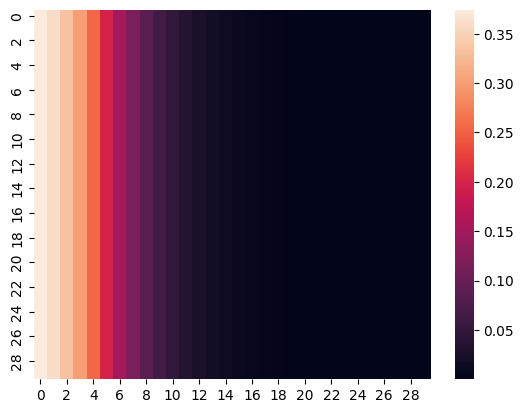

In [7]:
sns.heatmap(torch_sim.detach().numpy())
plt.show()
#sns.heatmap(torch_sim1.detach().numpy())
#plt.show()

In [5]:
ind = np.zeros((3, 50, 50), dtype=np.float32)
ind[-1, -1, :5] = [1, 0, 100, 20, .2]
ind[1, :, :2] = .3
#ind[3, :, :3] = 1.5
#ind[-1, 2, :3] = (.1,.3, .4)
ind[-1, 0, :3] = [.2, .1, .2]
#ind[-2, 0, :2] = (0,2)
#ind[-2, 1, :4] = (1,2,3,4)
params = {"species_1": tf.Variable([.2, .1, .2], trainable=True),
          "compartment_1": tf.Variable(ind[1], trainable=True)}

In [29]:
torch_sim1 = tsim_(individual=tf.convert_to_tensor(ind), parameters=params,
                 num_species=1, num_pairs=0, stop=20, time_step=0.2,
                 max_epoch=100, compartment=0)

<Axes: >

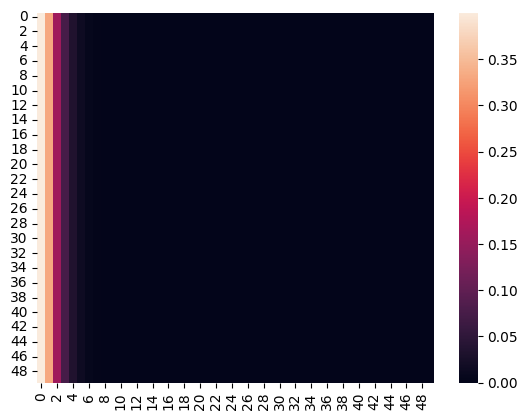

In [24]:
sns.heatmap(torch_sim1.numpy())

In [7]:
inds = np.zeros((3, 50, 50), dtype=np.float32)
inds[-1, -1, :5] = (1, 0, 100, 20, .2)
inds[1, :, :] = np.random.rand(50, 50) 
inds[-1, 0, :3] = np.random.rand(3)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
#torch.autograd.set_detect_anomaly(True)
individual = torch.from_numpy(inds)
# Sample parameter initialization (as an example, replace with actual values)
#inds = ...  # Your initial individual tensor
params = {
    "species_1": torch.tensor([.6, .1, .9], requires_grad=True),
    "compartment_1": torch.tensor(inds[1], requires_grad=False)
}

# Define target tensor and loss function
#torch_sim = torch.tensor(torch_sim)  # Ensure the target tensor does NOT have requires_grad=True
loss_fn = nn.MSELoss()

# Optimizer
optimizer = optim.Adam([param for param in params.values()], lr=0.1)

# Training Step
def train_step():
    optimizer.zero_grad()  # Reset gradients before each forward pass
    #for idx, param_group in enumerate(optimizer.param_groups):
        #print(f"Parameter Group {idx}:")
        #for param in param_group['params']:
            #print(f"\t{param}")  # Convert to numpy for easier reading

    # Forward pass: run the simulation
    simulation_output = tsim(individual=individual, parameters=params,
                             num_species=1, num_pairs=0, stop=20, time_step=0.2, 
                             max_epoch=100, compartment=0, device="cpu")
    #print(simulation_output)
    #print(individual)
    #simulation_output.requires_grad_()

    # Ensure simulation_output has requires_grad=True
    #if not simulation_output.requires_grad:
        #raise RuntimeError("Simulation output does not require grad. Check if the graph is disconnected.")
        
    
    # Compare with the target using the loss function
    loss = loss_fn(simulation_output, torch_sim)
    #print("loss is computed!")
    #print(loss)
    #torch.autograd.set_detect_anomaly(True)
    loss.backward(retain_graph=True)
    #print(params["species_1"].grad)
    #print(params["compartment_1"].grad)
    # Update the parameters
    optimizer.step()
    print(f"Current value of species_1: {params['compartment_1'].detach().numpy()}")
    print(f"Current value of species_1: {params['species_1'].detach().numpy()}")

    return loss.item()

# Training loop
num_epochs = 5 # Adjust as needed
for epoch in range(num_epochs):
    loss = train_step()
    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {loss}")



sim works!
Current value of species_1: [[0.16127256 0.577305   0.44739226 ... 0.7346997  0.24869962 0.95586   ]
 [0.18958811 0.9609011  0.22992013 ... 0.26339266 0.00425057 0.6576992 ]
 [0.23193707 0.90000254 0.40687245 ... 0.9223252  0.13821135 0.03161418]
 ...
 [0.14698434 0.70030516 0.15378612 ... 0.20999491 0.33424154 0.28078696]
 [0.42817515 0.69821036 0.9296007  ... 0.599057   0.40805697 0.2655052 ]
 [0.4405301  0.5499481  0.19232008 ... 0.8340321  0.12757011 0.4196686 ]]
Current value of species_1: [0.5 0.2 1. ]
Epoch 1/5, Loss: 5.525835990905762
sim works!
Current value of species_1: [[0.16127256 0.577305   0.44739226 ... 0.7346997  0.24869962 0.95586   ]
 [0.18958811 0.9609011  0.22992013 ... 0.26339266 0.00425057 0.6576992 ]
 [0.23193707 0.90000254 0.40687245 ... 0.9223252  0.13821135 0.03161418]
 ...
 [0.14698434 0.70030516 0.15378612 ... 0.20999491 0.33424154 0.28078696]
 [0.42817515 0.69821036 0.9296007  ... 0.599057   0.40805697 0.2655052 ]
 [0.4405301  0.5499481  0.19232

In [16]:
t = torch.tensor([1,2,3,4])
if t.requires_grad:
    print(True)
else:
    print(False)

False


In [8]:
tt = torch.zeros((1, 30,30))
tt[0, :, :] = torch_sim.detach()
#tt[1, :, :] = torch_sim1.detach() 

In [9]:
obj = opt_(
    target=tt,
    path="",
    file_name="torch_test.h5",
    epochs=5,
    learning_rate=[0.04],
    param_opt=True,
    param_type="all",
    compartment_opt=False,
    cost_alpha=0.6,
    cost_beta=0.4,
    max_val=1.0,
    checkpoint_interval=2,
    share_info=1,
    trainable_compartment=1,
    device="cpu")

In [10]:
inds = np.zeros((3, 30, 30), dtype=np.float32)
inds[-1, -1, :5] = (1, 0, 50, 10, .2)
inds[1, :, :] = np.random.rand(30, 30)
#inds[3, :, :] = np.random.rand(30, 30) 
inds[-1, 0, :3] = np.random.rand(3)
#inds[-1, 2, :3] = np.random.rand(3)
#inds[-2, 1, :4] = np.random.rand(4)
#inds[-2, 0, :2] = (0, 2)

In [11]:
ind_, cost_, = obj.gradient_optimization(agent=torch.from_numpy(inds))

C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:158: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(agent[-1, i, 0:3], dtype=torch.float32),
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:209: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(agent[k, :, :], dtype=torch.float32),


Iteration 1/5, Cost: 0.632057249546051
Iteration 2/5, Cost: 0.5706396102905273
Iteration 3/5, Cost: 0.5234109163284302
Iteration 4/5, Cost: 0.4867607355117798
Iteration 5/5, Cost: 0.45801565051078796


In [12]:
data = h5py.File(r"C:\Users\yda2\torch_test.h5", "a")
print(data.keys())

<KeysViewHDF5 ['agent', 'cost', 'ind', 'initial_conditions', 'simulation_results', 'target', 'time']>


In [13]:
print(data["cost"][:])

[[0.63205725]
 [0.57063961]
 [0.52341092]
 [0.48676074]
 [0.45801565]]


In [14]:
print(data["initial_conditions"].shape)
print(data["simulation_results"].shape)
print(data["target"].shape)
print(data["time"][:])
print(inds[-1, 0, :3])
print(data["agent"][-1, 0, :3])
print(data["agent"][-1, -1, :5])

(1, 5, 30, 30)
(1, 5, 30, 30)
(1, 30, 30)
[ 7.28091073  8.26767659 19.42463017]
[0.7052872 0.75356   0.7626214]
[0.7052872 0.75356   0.7626214]
[ 1.   0.  50.  10.   0.2]


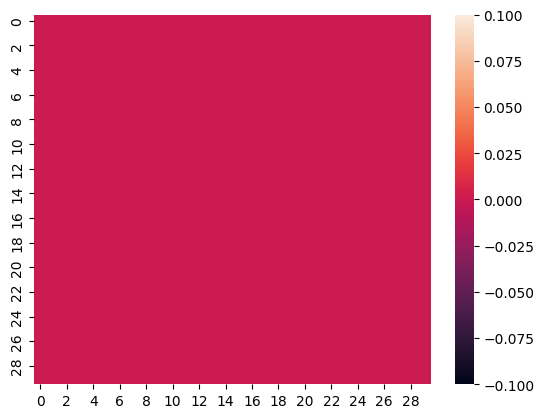

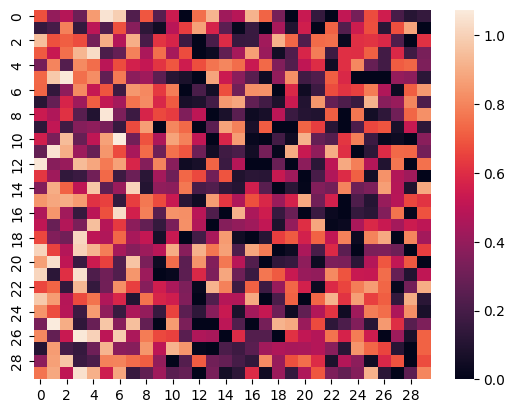

In [15]:
sns.heatmap(data["ind"][0])
plt.show()
sns.heatmap(data["ind"][1])
plt.show()

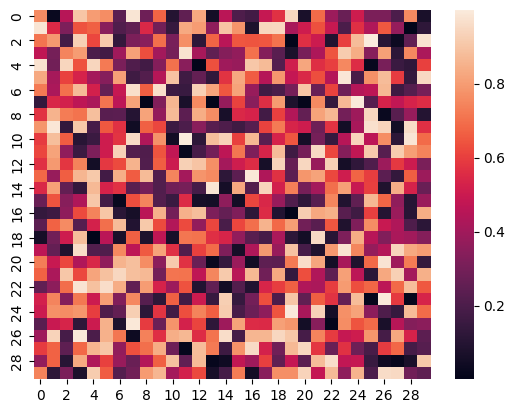

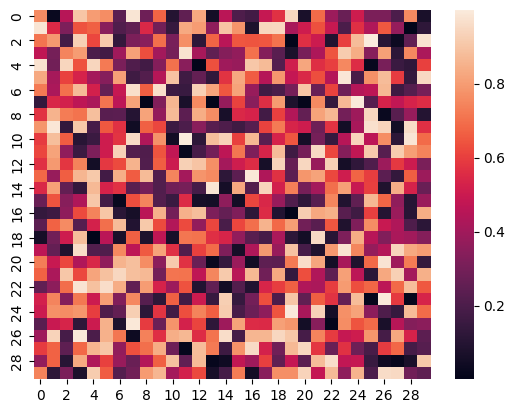

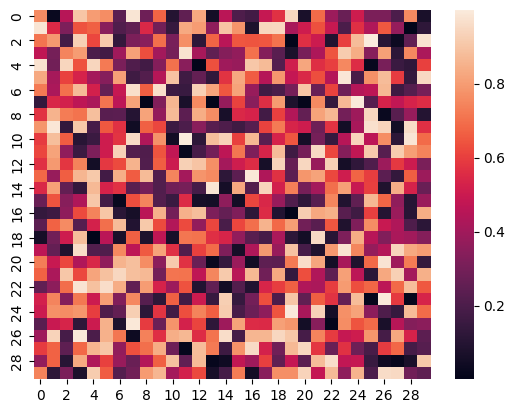

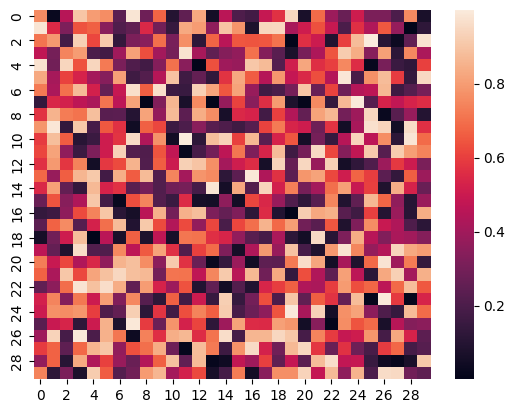

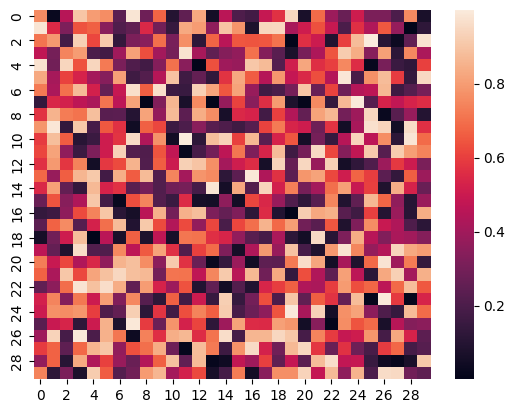

In [16]:
for i in range(5):
    sns.heatmap(data["initial_conditions"][0, i, :, :])
    plt.show()

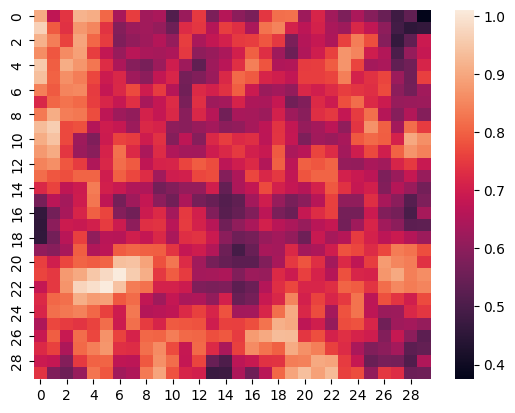

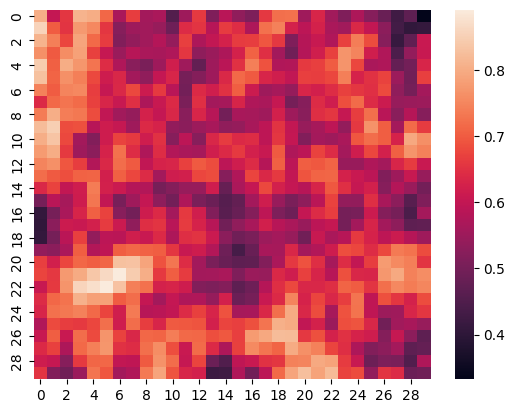

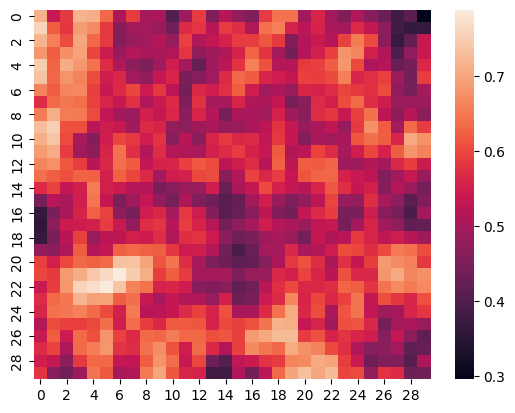

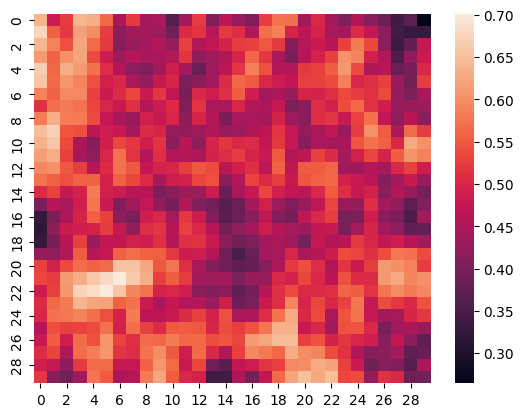

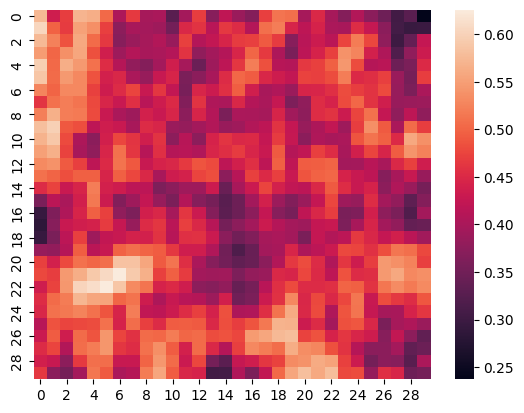

In [17]:
for i in range(5):
    sns.heatmap(data["simulation_results"][0, i, :, :])
    plt.show()

<Axes: >

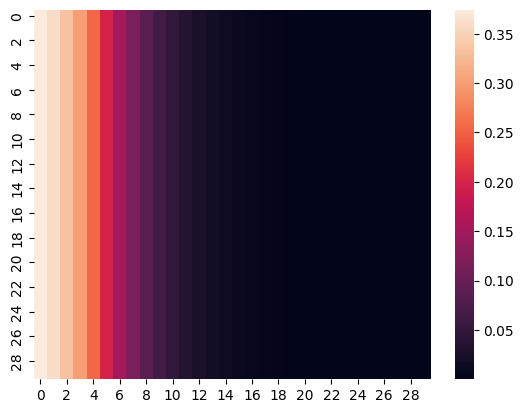

In [18]:
sns.heatmap(data["target"][0])

In [21]:
g = torch.nn.Parameter(torch.tensor([1, 2, 3, 4], dtype=torch.float32),requires_grad=False)
if not g.requires_grad:
    print(True)

True


In [6]:
obj = opt_(target=tt, path="", file_name="this")
obj1 = opt1_(target=tt, path="", file_name="this1")

In [7]:
p_ext = obj.parameter_extraction(individual=torch.from_numpy(ind), param_opt="not_all", compartment_opt=True, trainable_compartment=2)
p_ext1 = obj1.parameter_extraction(individual=tf.convert_to_tensor(ind), param_opt=True, compartment_opt=True, trainable_compartment=2)

extracted params:
--------------------------------------------
[{'species_1': <tf.Variable 'species_1:0' shape=(3,) dtype=float32, numpy=array([0.6, 0.1, 0.9], dtype=float32)>, 'species_2': <tf.Variable 'species_2:0' shape=(3,) dtype=float32, numpy=array([0.1, 0.3, 0.4], dtype=float32)>, 'pair_1': <tf.Variable 'pair_1:0' shape=(4,) dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>, 'compartment_1': <tf.Variable 'compartment_1:0' shape=(5, 5) dtype=float32, numpy=
array([[0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ]], dtype=float32)>, 'compartment_2': <tf.Variable 'compartment_2:0' shape=(5, 5) dtype=float32, numpy=
array([[1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ]], dtype=float32)>}, {'species_1': <tf.Variable 'species_1:0' shape=(3,) dtype=flo

C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:127: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(individual[-1, i, 0:3], dtype=torch.float32),
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:133: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(individual[-1, i, 0:3], dtype=torch.float32),
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:141: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(individual[j, 1, :4], dtype=torch.float32),
C:\Users\yda2\Downloa

In [8]:
for name, var in p_ext1[0][0].items():
    print(f"{name} is trainable: {var.trainable}")
for name, var in p_ext[0][0].items():
    print(f"{name} is trainable: {var.requires_grad}")

species_1 is trainable: True
species_2 is trainable: False
pair_1 is trainable: True
compartment_1 is trainable: True
compartment_2 is trainable: False
species_1 is trainable: True
species_2 is trainable: False
pair_1 is trainable: True
compartment_1 is trainable: True
compartment_2 is trainable: False


In [9]:
for name, var in p_ext1[0][1].items():
    print(f"{name} is trainable: {var.trainable}")
for name, var in p_ext[0][1].items():
    print(f"{name} is trainable: {var.requires_grad}")

species_1 is trainable: False
species_2 is trainable: True
pair_1 is trainable: True
compartment_1 is trainable: False
compartment_2 is trainable: True
species_1 is trainable: False
species_2 is trainable: True
pair_1 is trainable: True
compartment_1 is trainable: False
compartment_2 is trainable: True


In [10]:
print(p_ext)

([{'species_1': Parameter containing:
tensor([0.6000, 0.1000, 0.9000], requires_grad=True), 'species_2': Parameter containing:
tensor([0.1000, 0.3000, 0.4000]), 'pair_1': Parameter containing:
tensor([1., 2., 3., 4.], requires_grad=True), 'compartment_1': Parameter containing:
tensor([[0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000]], requires_grad=True), 'compartment_2': Parameter containing:
tensor([[1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000]])}, {'species_1': Parameter containing:
tensor([0.6000, 0.1000, 0.9000]), 'species_2': Parameter containing:
tensor([0.1000, 0.3000, 0.4000], requires_grad=True),

In [11]:
print(p_ext1)

([{'species_1': <tf.Variable 'species_1:0' shape=(3,) dtype=float32, numpy=array([0.6, 0.1, 0.9], dtype=float32)>, 'species_2': <tf.Variable 'species_2:0' shape=(3,) dtype=float32, numpy=array([0.1, 0.3, 0.4], dtype=float32)>, 'pair_1': <tf.Variable 'pair_1:0' shape=(4,) dtype=float32, numpy=array([1., 2., 3., 4.], dtype=float32)>, 'compartment_1': <tf.Variable 'compartment_1:0' shape=(5, 5) dtype=float32, numpy=
array([[0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ],
       [0.9, 0.9, 0. , 0. , 0. ]], dtype=float32)>, 'compartment_2': <tf.Variable 'compartment_2:0' shape=(5, 5) dtype=float32, numpy=
array([[1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ],
       [1.5, 1.5, 1.5, 0. , 0. ]], dtype=float32)>}, {'species_1': <tf.Variable 'species_1:0' shape=(3,) dtype=float32, numpy=array([0.6, 0.1, 0.9], dtype=float32)>, 'species_2

In [70]:
ind1 = np.zeros((7, 5, 5), dtype=np.float32)
ind1[-1, -1, :5] = (2.0, 1.0, 100, 20, .2)

In [71]:
up1 = obj.update_parameters(individual=torch.from_numpy(ind1), parameters=p_ext[0], param_opt=True, trainable_compartment=2)
up2 = obj1.update_parameters(individual=tf.convert_to_tensor(ind1), parameters=p_ext1[0], param_opt=True, trainable_compartment=2)

In [72]:
print(up1)
print(up2)

tensor([[[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000]],

        [[  0.9000,   0.9000,   0.0000,   0.0000,   0.0000],
         [  0.9000,   0.9000,   0.0000,   0.0000,   0.0000],
         [  0.9000,   0.9000,   0.0000,   0.0000,   0.0000],
         [  0.9000,   0.9000,   0.0000,   0.0000,   0.0000],
         [  0.9000,   0.9000,   0.0000,   0.0000,   0.0000]],

        [[  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,   0.0000,   0.0000]],

        [[  1.5000,   1.5000,   1.5000,   0.0000,   0.0000],
         [  1.5000

In [77]:
n = torch.nn.Parameter(torch.tensor([1,2,3,4,5]), requires_grad=False)
m = torch.nn.Parameter(torch.tensor([10, 20, 30, 40, 50]), requires_grad=False)
b = torch.nn.Parameter(torch.tensor([100, 20, 3, 4, 60]), requires_grad=False)
g = [n, m, b]

In [10]:
params = [
        {
            'species_1': torch.nn.Parameter(torch.tensor([0.6, 0.1, 0.9], requires_grad=True)),
            'species_2': torch.nn.Parameter(torch.tensor([0.0, 0.0, 0.0]), requires_grad=False),
            'pair_1': torch.nn.Parameter(torch.tensor([1.0, 2.0, 3.0], requires_grad=True)),
            'pair_2': torch.nn.Parameter(torch.tensor([4.0, 5.0, 6.0], requires_grad=True)),
        },
        {
            'species_1': torch.nn.Parameter(torch.tensor([0.0, 0.0, 0.0]), requires_grad=False),
            'species_2': torch.nn.Parameter(torch.tensor([0.1, 0.3, 0.4], requires_grad=True)),
            'pair_1': torch.nn.Parameter(torch.tensor([1.5, 2.5, 3.5], requires_grad=True)),
            'pair_2': torch.nn.Parameter(torch.tensor([4.5, 5.5, 6.5]), requires_grad=True),
        },
        {
            'species_1': torch.nn.Parameter(torch.tensor([0.02, 0.02, 0.02]), requires_grad=False),
            'species_2': torch.nn.Parameter(torch.tensor([0.1, 0.3, 0.4], requires_grad=True)),
            'pair_1': torch.nn.Parameter(torch.tensor([11.5, 22.5, 32.5], requires_grad=True)),
            'pair_2': torch.nn.Parameter(torch.tensor([41.5, 52.5, 61.5]), requires_grad=True),
        }
    ]

# Before updating
print("Before updating:")
for i, p in enumerate(params):
    print(f"Dictionary {i}: {p}")

info1 = obj.share_information(params)

  



# Call the share_information function


# After updating
print("\nAfter updating:")
for i, p in enumerate(info1):
    print(f"Dictionary {i}: {p}")

Before updating:
Dictionary 0: {'species_1': Parameter containing:
tensor([0.6000, 0.1000, 0.9000], requires_grad=True), 'species_2': Parameter containing:
tensor([0., 0., 0.]), 'pair_1': Parameter containing:
tensor([1., 2., 3.], requires_grad=True), 'pair_2': Parameter containing:
tensor([4., 5., 6.], requires_grad=True)}
Dictionary 1: {'species_1': Parameter containing:
tensor([0., 0., 0.]), 'species_2': Parameter containing:
tensor([0.1000, 0.3000, 0.4000], requires_grad=True), 'pair_1': Parameter containing:
tensor([1.5000, 2.5000, 3.5000], requires_grad=True), 'pair_2': Parameter containing:
tensor([4.5000, 5.5000, 6.5000], requires_grad=True)}
Dictionary 2: {'species_1': Parameter containing:
tensor([0.0200, 0.0200, 0.0200]), 'species_2': Parameter containing:
tensor([0.1000, 0.3000, 0.4000], requires_grad=True), 'pair_1': Parameter containing:
tensor([11.5000, 22.5000, 32.5000], requires_grad=True), 'pair_2': Parameter containing:
tensor([41.5000, 52.5000, 61.5000], requires_gr

In [8]:


# Assuming p_ext is your list of dictionaries
p_ext = [{'species_1': torch.tensor([0.6000, 0.1000, 0.9000], requires_grad=True),
          'species_2': torch.tensor([0.1000, 0.3000, 0.4000]),
          'pair_1': torch.tensor([1., 2., 3., 4.], requires_grad=True),
          'compartment_1': torch.tensor([[0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000]], requires_grad=True),
          'compartment_2': torch.tensor([[1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000]])},
         {'species_1': torch.tensor([0.6000, 0.1000, 0.9000]),
          'species_2': torch.tensor([0.1000, 0.3000, 0.4000], requires_grad=True),
          'pair_1': torch.tensor([10., 12., 31., 14.], requires_grad=True),
          'compartment_1': torch.tensor([[0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
                                         [0.9000, 0.9000, 0.0000, 0.0000, 0.0000]]),
          'compartment_2': torch.tensor([[1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
                                         [1.5000, 1.5000, 1.5000, 0.0000, 0.0000]], requires_grad=True)}]

# Extract pair_1 tensors from all dictionaries
pair_1_list = [d['pair_1'] for d in p_ext]

# Calculate the element-wise mean
mean_pair_1 = torch.mean(torch.stack(pair_1_list), dim=0)

# Update pair_1 in each dictionary with the mean value
for d in p_ext:
    d['pair_1'] = mean_pair_1

# Verify the update
print(p_ext)


[{'species_1': tensor([0.6000, 0.1000, 0.9000], requires_grad=True), 'species_2': tensor([0.1000, 0.3000, 0.4000]), 'pair_1': tensor([ 5.5000,  7.0000, 17.0000,  9.0000], grad_fn=<MeanBackward1>), 'compartment_1': tensor([[0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000],
        [0.9000, 0.9000, 0.0000, 0.0000, 0.0000]], requires_grad=True), 'compartment_2': tensor([[1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000],
        [1.5000, 1.5000, 1.5000, 0.0000, 0.0000]])}, {'species_1': tensor([0.6000, 0.1000, 0.9000]), 'species_2': tensor([0.1000, 0.3000, 0.4000], requires_grad=True), 'pair_1': tensor([ 5.5000,  7.0000, 17.0000,  9.0000], grad_fn=<MeanBackward1>), 'compartment_1': tensor([[0.9000, 0.9000, 0.0000

In [14]:
ind = torch.zeros((7, 50, 50))
ind[-1, -1, :5] = torch.tensor([2,1,100,20,.2])
#ind[]
ind[0, :, :] = 1.02
ind[2, :, :] = 2.1
ind[4, :, :] = 3.2
ind[1, :, :] = 1.02
ind[3, :, :] = 2.1
ind[5, :, :] = 3.2

In [15]:
init = obj.init_individual(ind)

In [16]:
init

tensor([[[  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         ...,
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000],
         [  0.0000,   0.0000,   0.0000,  ...,   0.0000,   0.0000,   0.0000]],

        [[  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200],
         [  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200],
         [  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200],
         ...,
         [  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200],
         [  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200],
         [  1.0200,   1.0200,   1.0200,  ...,   1.0200,   1.0200,   1.0200]],

        [[  0.0000,   0.0000,   0.0000,  ...

In [19]:
cost_ = obj.compute_cost_(y_hat=init[1,:,:], target=init[3, :, :], alpha=0.2, beta=0.4, max_val=1.0)
cost1_ = obj1.compute_cost_(y_hat=init[1,:,:], target=init[3, :, :], alpha=0.2, beta=0.4, max_val=1.0)

In [18]:
cost_

tensor(0.3173)

In [20]:
cost1_

<tf.Tensor: shape=(), dtype=float32, numpy=0.31887925>

In [4]:
f = 4
for i in range(100):
    if i%f == 0:
        print(i)

0
4
8
12
16
20
24
28
32
36
40
44
48
52
56
60
64
68
72
76
80
84
88
92
96


In [43]:
individual[j, :, i]

Epoch 1/30, Loss: 2.1550002098083496
Epoch 2/30, Loss: 2.01590633392334
Epoch 3/30, Loss: 1.889054298400879
Epoch 4/30, Loss: 1.7734628915786743
Epoch 5/30, Loss: 1.667293906211853
Epoch 6/30, Loss: 1.5695552825927734
Epoch 7/30, Loss: 1.4799082279205322
Epoch 8/30, Loss: 1.3980482816696167
Epoch 9/30, Loss: 1.3235710859298706
Epoch 10/30, Loss: 1.2560207843780518
Epoch 11/30, Loss: 1.194954752922058
Epoch 12/30, Loss: 1.1399692296981812
Epoch 13/30, Loss: 1.0906883478164673
Epoch 14/30, Loss: 1.0467404127120972
Epoch 15/30, Loss: 1.0077391862869263
Epoch 16/30, Loss: 0.9732778072357178
Epoch 17/30, Loss: 0.9429268836975098
Epoch 18/30, Loss: 0.9162412285804749
Epoch 19/30, Loss: 0.892766535282135
Epoch 20/30, Loss: 0.8720508813858032
Epoch 21/30, Loss: 0.8536537885665894
Epoch 22/30, Loss: 0.8371554613113403
Epoch 23/30, Loss: 0.8221650123596191
Epoch 24/30, Loss: 0.8083274364471436
Epoch 25/30, Loss: 0.7953261733055115
Epoch 26/30, Loss: 0.7828862071037292
Epoch 27/30, Loss: 0.770774

In [31]:
params = {
    "p1": torch.tensor([1.0,2.0,3.0,4.0], requires_grad=True),
    "p2": torch.tensor([2.0, .2, .3, .4], requires_grad=False)
}
g = params["p1"]*torch.tensor([[.1,.1,.21,.1]]) + params["p2"]*torch.tensor([.1,.1,.21,.1])
print(g.shape)

torch.Size([1, 4])


In [32]:
h = torch.zeros((4,))

In [33]:
h.shape

torch.Size([4])

In [2]:

for i in range(20):
    if i % 5 == 0 and i > 10:
        print(i)

15


In [5]:
sp = 1
for i in range(5):
    for j in range(5):
        if int(sp -1) == i:
            print(i)
        else:
            print("False")
        sp +=1

0
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False


In [135]:
def parameter_extraction(agent, param_type, compartment_opt, trainable_compartment):
    params = []
    num_species = int(agent[-1, -1, 0])
    num_pairs = int(agent[-1, -1, 1])
    max_epoch = int(agent[-1, -1, 2])
    stop = int(agent[-1, -1, 3])
    time_step = agent[-1, -1, 4]
    pair_start = int(num_species * 2)
    pair_stop = int(pair_start + (num_pairs * 2))

    for t in range(trainable_compartment):

        parameters = {}
        if param_type == "not_all" and trainable_compartment == num_species:
            s = 1
            for i in range(0, num_species*2, 2):
                if int(s-1) == t:
                    parameters[f"species_{s}"] = torch.tensor(
                        agent[-1, i, 0:3].clone(),
                        requires_grad=True
                    )
                    s+= 1
                else:
                    parameters[f"species_{s}"] = torch.tensor(
                        agent[-1, i, 0:3].clone().detach()
                    )
                    s+= 1
            p = 1
            for j in range(pair_start + 1, pair_stop + 1, 2):
                parameters[f"pair_{p}"] = torch.tensor(
                    agent[j, 1, :4].clone(),
                    requires_grad=True
                )
                p += 1
            
            c = 1
            for com in range(1, num_species*2, 2):
                if int(c-1) == t:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone(),
                        requires_grad=True
                    )
                    c+= 1
                else:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone().detach()
                    )
                    c+= 1
            params.append(parameters)
            
        elif param_type == "not_all" and trainable_compartment < num_species:
            
            s = 1
            for i in range(0, num_species*2, 2):
                if int(s-1) == t:
                    parameters[f"species_{s}"] = torch.tensor(
                        agent[-1, i, 0:3].clone(),
                        requires_grad=True
                    )
                    s+= 1
                elif s <= trainable_compartment:
                    parameters[f"species_{s}"] = torch.tensor(
                        agent[-1, i, 0:3].clone().detach()
                    )
                    s+= 1
                else:
                    parameters[f"species_{s}"] = torch.tensor(
                        agent[-1, i, 0:3].clone(),
                        requires_grad=True
                    )
                    s+= 1
            p = 1
            for j in range(pair_start + 1, pair_stop + 1, 2):
                parameters[f"pair_{p}"] = torch.tensor(
                    agent[j, 1, :4].clone(),
                    requires_grad=True
                )
                p += 1

            c = 1
            for com in range(1, num_species*2, 2):
                if int(c-1) == t:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone(),
                        requires_grad=True
                    )
                    c+= 1
                else:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone(),
                        requires_grad=False
                    )
                    c+= 1
                    
            params.append(parameters)
        
        elif param_type == "all" and compartment_opt:
            s = 1
            for i in range(0, num_species*2, 2):
                parameters[f"species_{s}"] = torch.tensor(
                    agent[-1, i, 0:3].clone(),
                    requires_grad=True
                )
                s+= 1
            p = 1
            for j in range(pair_start + 1, pair_stop + 1, 2):
                parameters[f"pair_{p}"] = torch.tensor(
                    agent[j, 1, :4].clone(),
                    requires_grad=True
                )
                p += 1
                
            c = 1
            for com in range(1, num_species*2, 2):
                if int(c-1) == t:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone(),
                        requires_grad=True
                    )
                    c+= 1
                else:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone().detach()
                    )
                    c+= 1
            params.append(parameters)
            
        elif compartment_opt and not param_type:
            s = 1
            for i in range(0, num_species*2, 2):
                parameters[f"species_{s}"] = torch.tensor(
                    agent[-1, i, 0:3].clone().detach()
                )
                s+= 1
            p = 1
            for j in range(pair_start + 1, pair_stop + 1, 2):
                parameters[f"pair_{p}"] = torch.tensor(
                    agent[j, 1, :4].clone().detach()
                )
                p += 1
            
            c = 1
            for com in range(1, num_species*2, 2):
                if int(c-1) == t:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone(),
                        requires_grad=True
                    )
                    c+= 1
                else:
                    parameters[f"compartment_{c}"] = torch.tensor(
                        agent[com, :, :].clone().detach()
                    )
                    c+= 1
            params.append(parameters)

    parameters = {}      
    if trainable_compartment == 0 and param_type:
        s = 1
        for i in range(0, num_species*2, 2):
            parameters[f"species_{s}"] = torch.tensor(
            agent[-1, i, 0:3].clone(),
            requires_grad=True
            )
            s+= 1
               
        p = 1
        for j in range(pair_start + 1, pair_stop + 1, 2):
            parameters[f"pair_{p}"] = torch.tensor(
                agent[j, 1, :4].clone(),
                requires_grad=True
            )
            p += 1
            
        c = 1
        for com in range(1, num_species*2, 2):
            parameters[f"compartment_{c}"] = torch.tensor(
                agent[com, :, :].clone().detach()
            )
            c+= 1
        params.append(parameters)
              
    return params, num_species, num_pairs, max_epoch, stop, time_step                  

In [1]:
import numpy as np
import torch
from optimize import AdamOptimization as aopt_

In [5]:
agent = np.zeros((13, 10, 10), dtype=np.float32)
agent[-1, -1,:5] = (3, 3, 100, 20, .2)
agent[-1, 0, :3] = (100, 100, 100)
agent[-1, 2, :3] = (200, 200, 200)
agent[-1, 4, :3] = (250, 250, 250)
agent[-2, 0, :2] = (0, 2)
agent[-2, 1, :4] = (300, 300, 300, 300)
agent[-4, 0, :2] = (0, 4)
agent[-4, 1, :4] = (600, 600, 600, 600)
agent[-6, 0, :2] = (2, 4)
agent[-6, 1, :4] = (900, 900, 900, 900)
agent[1, :, :] = np.full((10,10), fill_value=5)
agent[3, :, :] = np.full((10,10), fill_value=10)
agent[5, :, :] = np.full((10,10), fill_value=20)

t = torch.rand(size=(1, 10, 10))

In [13]:
obj = aopt_(
    target=t,
    path="",
    file_name="ttttt",
    epochs=1,
    learning_rate=None,
    param_opt=False,
    param_type="not_all",
    compartment_opt=True,
    cost_alpha=0.6,
    cost_beta=0.4,
    max_val=1.0,
    checkpoint_interval=10,
    share_info=4,
    lr_decay=False,
    decay_steps=40,
    decay_rate=0.6,
    trainable_compartment=0
)               

In [14]:
ag, co = obj.gradient_optimization(agent=torch.from_numpy(agent))

C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:282: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameters[f"species_{s}"] = torch.tensor(
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:290: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameters[f"pair_{p}"] = torch.tensor(
C:\Users\yda2\Downloads\projects\master_project\new_\optimize.py:298: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  parameters[f"compartment_{c}"] = torch.tensor(


params:
_______________________________________________________________________________
species_1: True
species_2: True
species_3: True
pair_1: True
pair_2: True
pair_3: True
compartment_1: False
compartment_2: False
compartment_3: False


IndexError: index 0 is out of bounds for axis 0 with size 0